In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import glob
import scipy.linalg as la
import seaborn as sns

In [2]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [3]:
# Setup #
L = 9
dense = True
pert = True
prefix = 'data/zotoc_dense'
sites = np.arange(L)
# print(prefix + "foreL" + str(L) + "v*.npy")
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [4]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(    float(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[:,::-1])
    vsback.append(float(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

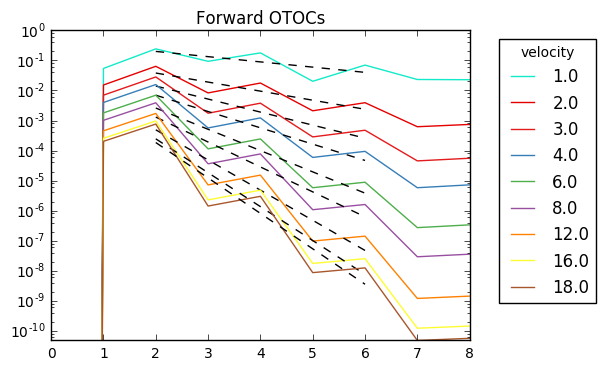

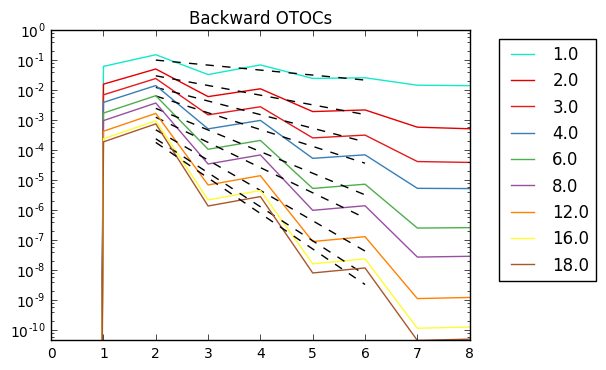

In [9]:
# Forward
ax = plt.subplot(111)
gammas_fore = []
errors_fore = []
for idx, otocfore in enumerate(otocsfore):
    mean, std = qm.mean_and_std(otocfore[::])
    ax.set_yscale("log", nonposy='clip')
    ax.errorbar(sites[::], mean, label = str(vs[idx]))
#     ax.errorbar(sites[::], mean, yerr=std, label = str(vs[idx]))
    x = sites[2:7:]
    y = mean[2:7:]
    logy = np.log(y)
    coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_fore.append(coeffs[0] * vs[idx])
    errors_fore.append(np.sqrt(errors[0,0]) * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title="velocity")
plt.ylim(0,1)
plt.title("Forward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'foreL' + str(L) + '.pdf')
plt.show()

# Backward
ax = plt.subplot(111)
gammas_back = []
errors_back = []
for idx, otocback in enumerate(otocsback):
    mean, std = qm.mean_and_std(otocback[::])
    ax.set_yscale("log", nonposy='clip')
    ax.errorbar(sites[::], mean, label = str(vs[idx]))
#     ax.errorbar(sites[::], mean, yerr=std, label = str(vs[idx]))
    x = sites[2:7:]
    y = mean[2:7:]
    logy = np.log(y)
    coeffs, errors = np.polyfit(x,logy,deg=1, cov=True)
#     print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.plot(x,yfit(x), 'k--')
    gammas_back.append(coeffs[0] * vs[idx])
    errors_back.append(np.sqrt(errors[0,0]) * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs")
# plt.savefig('figures/otocs_' + fix + 'backL' + str(L) + '.pdf')
plt.show()

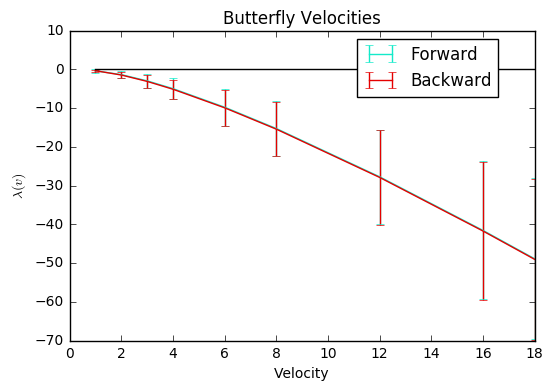

In [11]:
ax = plt.subplot(111)
ax.errorbar(vs, gammas_fore, yerr=errors_fore,  label = "Forward")
ax.errorbar(vs, gammas_back, yerr=errors_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities")
plt.xlabel("Velocity")
plt.ylabel("$\lambda(v)$")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [ ]:
stop here

In [ ]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore,  label = "Forward")
ax.plot(vs, gammas_back,  label = "Backward")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities")
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
plt.savefig('figures/butterfly_L' + str(L) + '.pdf')
plt.show()

In [ ]:
np.shape(otocsfore)

In [ ]:
print(np.average(otocsfore, axis=1))

In [ ]:
forenames

In [10]:
otocsfore

array([[[0.00000000e+00, 5.42534255e-02, 2.43278493e-01, 9.37704888e-02,
         1.78679193e-01, 2.02613634e-02, 7.01398401e-02, 2.32447006e-02,
         2.28557349e-02]],

       [[0.00000000e+00, 1.52493755e-02, 6.39096134e-02, 8.30135913e-03,
         1.77203471e-02, 2.10856334e-03, 3.91765310e-03, 6.20937371e-04,
         7.40233350e-04]],

       [[0.00000000e+00, 6.98948984e-03, 2.82530305e-02, 1.74902371e-03,
         3.77924430e-03, 2.84341783e-04, 4.74347043e-04, 4.51954020e-05,
         5.53200836e-05]],

       [[0.00000000e+00, 3.98621620e-03, 1.57901277e-02, 5.65922912e-04,
         1.22136981e-03, 5.89618802e-05, 9.39129013e-05, 5.77338960e-06,
         7.18808551e-06]],

       [[0.00000000e+00, 1.79432992e-03, 6.95611308e-03, 1.13540572e-04,
         2.43509936e-04, 5.77693120e-06, 8.79783166e-06, 2.70419755e-07,
         3.34376283e-07]],

       [[0.00000000e+00, 1.01533617e-03, 3.89222532e-03, 3.61109552e-05,
         7.70569130e-05, 1.06855544e-06, 1.59186584e-06, 

In [20]:
a = []
a.extend([1])
a.extend([1,2])
print(a)

[1, 1, 2]
